In [7]:
#Import Tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
%matplotlib inline

In [8]:
#Download the Dataset
data = pd.read_csv("Philly.csv")

#Cleaning the Dataset
list(data.columns.values)
data = data.drop(["Zillow Address","Sale Date","Opening Bid","Book/Writ","OPA","Attorney","Ward","Seller","Buyer","Sheriff Cost",
                "Advertising","Other","Record Deed","Water","PGW"," bathrooms "," bedrooms ","PropType","Zillow Estimate","taxAssessment",
                "Average comps"], axis = 1)
                
#Rename the Columns
data.columns = ['address','price','zip','transit_score','violent_crime_rate','school_score','rent_estimate','year_built','size']

In [9]:
#Change Data Types & Removing Missing Data 
import re
data.price = data.price.apply(lambda x: float(re.sub(r'[$|,]+', '', x)))
data.rent_estimate = data.rent_estimate.apply(lambda x: float(re.sub(r'[,]+', '', x)))
indexNames = data[data['year_built'] == 0].index
data.drop(indexNames, inplace = True)

In [11]:
data.columns

Index(['address', 'price', 'zip', 'transit_score', 'violent_crime_rate',
       'school_score', 'rent_estimate', 'year_built', 'size'],
      dtype='object')

C:\Users\KaiNan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


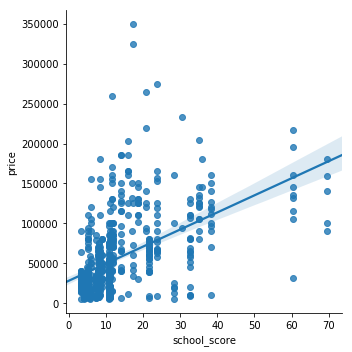

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     974.8
Date:                Wed, 12 Dec 2018   Prob (F-statistic):          6.60e-128
Time:                        18:31:51   Log-Likelihood:                -7329.7
No. Observations:                 602   AIC:                         1.466e+04
Df Residuals:                     601   BIC:                         1.467e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
school_score  3353.4098    107.406     31.222   

In [12]:
#Function: This function is used to see the relation between price and other variables by graph and OLS regression model.
def philly(var):
    for factor in var:
        sns.lmplot(x = factor, y = 'price', data = data)
        plt.show()
        print(smf.OLS(data['price'], data[factor]).fit().summary())

#Show what Variables we have
data.columns

#Use the Function
philly(['school_score'])